# MELTS
  
Versions of MELTS implemented are:  
- MELTS v. 1.0.2 ➞ (rhyolite-MELTS, Gualda et al., 2012)  
- MELTS v. 1.1.0 ➞ (rhyolite-MELTS + new CO<sub>2</sub>, works at the ternary minimum)  
- MELTS v. 1.2.0 ➞ (rhyolite-MELTS + new H<sub>2</sub>O + new CO<sub>2</sub>)  
- pMELTS v. 5.6.1

## Initialize tools and packages that are required to execute this notebook.

In [26]:
from thermoengine import equilibrate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy
%matplotlib inline

## Create a MELTS v 1.0.2 instance.
Rhyolite-MELTS version 1.0.2 is the default model.

In [2]:
melts = equilibrate.MELTSmodel(version="5.6.1")

### Optional: Generate some information about the implemented model.

In [3]:
oxides = melts.get_oxide_names()
phases = melts.get_phase_names()
#print (oxides)
#print (phases)

## Required: Input initial composition of the system (liquid), in wt% or grams of oxides. 
Mid-Atlantic ridge MORB composition

In [4]:
#Fe2O3 Calc 
def Fe2O3Calc(FeOwt, Fe3FeT_ratio):
    FeO = FeOwt * (1 - Fe3FeT_ratio)
    Fe2O3 = FeOwt * (Fe3FeT_ratio) * 1.11 # 1.11 converts for molar mass diferences
    return FeO, Fe2O3

In [ ]:
# Workman and Hart Depleted MORB Mantle

melt_composition = {'SiO2':  44.7, 
                   'TiO2':   0.13, 
                   'Al2O3':  3.98, 
                   #'Fe2O3':  Fe2O3,#  # Need to calcuate ferric iron for models to run properly Assumed 4%
                   'Cr2O3':  0.57, 
                   'FeO':    8.18, # Total Feo 8.18 wt% 
                   'MnO':    0.0, #0.13 Excluded for modeling
                   'MgO':   38.73, 
                   #'NiO':    0.0, #0.24 Excluded 
                   #'CoO':    0.0,
                   'CaO':    3.17, 
                   'Na2O':   0.28, 
                   'K2O':    0.006, #0.006
                   #'P2O5':   0.0, # 0.019
                   #'H2O':    0.011,
                   }

def set_melt_composition(comp_dict_init, Fe3FeT_ratio, H2O_wt, melts_object = melts):
    # Assumes all iron is input as FeO modify this if needed
    comp_dict = deepcopy(comp_dict_init)
    FeO, Fe2O3 = Fe2O3Calc(comp_dict['FeO'],Fe3FeT_ratio) 
    comp_dict.update([("FeO",FeO), ("Fe2O3", Fe2O3), ("H2O",H2O_wt)])
    # Set bulk composition in Melts
    melts_object.set_bulk_composition(comp_dict) # 0.011 Water included 110 ppm

In [6]:
set_melt_composition(melt_composition, Fe3FeT_ratio=0.1, H2O_wt=0.011)

## Optional: Suppress phases that are not required in the simulation.

In [7]:
b = melts.get_phase_inclusion_status()
melts.set_phase_inclusion_status({'Actinolite':False, 'Aegirine':False, \
                                  'Aenigmatite':False, 'Akermanite':False, 'Andalusite':False, \
                                  'Anthophyllite':False, 'Apatite':True, 'Biotite':False, 'Chromite':False, \
                                  'Coesite':False, 'Corundum':False, 'Cristobalite':False, 'Cummingtonite':False, \
                                  'Fayalite':False, 'Forsterite':False, 'Gehlenite':False, 'Hematite':False, \
                                  'Hornblende':False, 'Ilmenite':False, 'Ilmenite ss':False, 'Kalsilite':False, \
                                  'Kalsilite ss':False, 'Kyanite':False, 'Leucite':False, 'Lime':False, \
                                  'Liquid Alloy':False, 'Magnetite':False, 'Melilite':False, 'Muscovite':False, \
                                  'Nepheline':False, 'Nepheline ss':False, 'OrthoOxide':False, 'Panunzite':False, \
                                  'Periclase':False, 'Perovskite':False, 'Phlogopite':False, 'Quartz':False, \
                                  'Rutile':False, 'Sanidine':False, 'Sillimanite':False, 'Solid Alloy':False, \
                                  'Sphene':False, 'Tridymite':False, 'Whitlockite':False})

a = melts.get_phase_inclusion_status()
for phase in b.keys():
    if b[phase] != a[phase]:
        print ("{0:<15s} Before: {1:<5s} After: {2:<5s}".format(phase, repr(b[phase]), repr(a[phase])))

Actinolite      Before: True  After: False
Aegirine        Before: True  After: False
Aenigmatite     Before: True  After: False
Akermanite      Before: True  After: False
Andalusite      Before: True  After: False
Anthophyllite   Before: True  After: False
Biotite         Before: True  After: False
Chromite        Before: True  After: False
Coesite         Before: True  After: False
Corundum        Before: True  After: False
Cristobalite    Before: True  After: False
Cummingtonite   Before: True  After: False
Fayalite        Before: True  After: False
Forsterite      Before: True  After: False
Gehlenite       Before: True  After: False
Hematite        Before: True  After: False
Hornblende      Before: True  After: False
Ilmenite        Before: True  After: False
Ilmenite ss     Before: True  After: False
Kalsilite       Before: True  After: False
Kalsilite ss    Before: True  After: False
Kyanite         Before: True  After: False
Leucite         Before: True  After: False
Lime       

## Compute the equilibrium state at some specified T (°C) and P (MPa).
Print status of the calculation.

In [8]:
# # Set the initial P and T for the Run here!

# # output = melts.equilibrate_tp(1410.0,2000.0, initialize=True) # 1410 at 2GPa is about the temp at caclulated at calculated for an adiabat at mantle potential temperature of 1377. After Calcs by Katsura 2022
output = melts.equilibrate_tp(1390.0,2000.0, initialize=True) # 1410 at 2GPa is about the temp at caclulated at calculated for an adiabat at mantle potential temperature of 1377. After Calcs by Katsura 2022


In [9]:
(status, t, p, xmlout) = output[0]
print (status, t, p)

success, Optimal residual norm. 1390.0 2000.0


### Summary output of equilibrium state ...

In [10]:
melts.output_summary(xmlout)
# dict = melts.get_dictionary_of_affinities(xmlout, sort=True)
# for phase in dict:
#     (affinity, formulae) = dict[phase]
#     if affinity < 10000.0:
#         print ("{0:<20s} {1:10.2f} {2:<60s}".format(phase, affinity, formulae))

T (°C)      1390.00
P (MPa)     2000.00
Spinel            3.7239 (g)  Fe''0.19Mg0.82Fe'''0.18Al1.47Cr0.33Ti0.01O4                 
Orthopyroxene    24.9430 (g)  Na0.01Ca0.07Fe''0.15Mg1.66Fe'''0.03Ti0.01Al0.17Si1.90O6     
Olivine          53.7286 (g)  (Ca0.00Mg0.90Fe''0.10Mn0.00Co0.00Ni0.00)2SiO4               
Liquid            1.1203 (g)  wt%:SiO2 43.37 TiO2  0.78 Al2O3 13.96 Fe2O3  2.67 Cr2O3  0.08 FeO  8.89 MnO  0.00 MgO
                                  16.15 NiO  0.00 CoO  0.00 CaO  6.22 Na2O  6.36 K2O  0.54 P2O5  0.00 H2O  0.98
Augite           16.3312 (g)  Na0.07Ca0.59Fe''0.11Mg1.03Fe'''0.05Ti0.01Al0.27Si1.87O6     


### Obtain default set of fractionation coefficients (retain liquids, fractionate solids and fluids)

In [11]:
# dict

In [12]:
#frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=False, fracSolid=True, fracFluid=True, fracCoeff=0.01)
frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=True, fracSolid=False, fracFluid=False, fracCoeff=0.0)
print (frac_coeff)

{'Actinolite': 0.0, 'Aegirine': 0.0, 'Aenigmatite': 0.0, 'Akermanite': 0.0, 'Andalusite': 0.0, 'Anthophyllite': 0.0, 'Apatite': 0.0, 'Augite': 0.0, 'Biotite': 0.0, 'Chromite': 0.0, 'Coesite': 0.0, 'Corundum': 0.0, 'Cristobalite': 0.0, 'Cummingtonite': 0.0, 'Fayalite': 0.0, 'Forsterite': 0.0, 'Garnet': 0.0, 'Gehlenite': 0.0, 'Hematite': 0.0, 'Hornblende': 0.0, 'Ilmenite': 0.0, 'Ilmenite ss': 0.0, 'Kalsilite': 0.0, 'Kalsilite ss': 0.0, 'Kyanite': 0.0, 'Leucite': 0.0, 'Lime': 0.0, 'Liquid': 0.0, 'Liquid Alloy': 0.0, 'Magnetite': 0.0, 'Melilite': 0.0, 'Muscovite': 0.0, 'Nepheline': 0.0, 'Nepheline ss': 0.0, 'Olivine': 0.0, 'OrthoOxide': 0.0, 'Orthopyroxene': 0.0, 'Panunzite': 0.0, 'Periclase': 0.0, 'Perovskite': 0.0, 'Phlogopite': 0.0, 'Pigeonite': 0.0, 'Plagioclase': 0.0, 'Quartz': 0.0, 'Rutile': 0.0, 'Sanidine': 0.0, 'Sillimanite': 0.0, 'Solid Alloy': 0.0, 'Sphene': 0.0, 'Spinel': 0.0, 'Titanaugite': 0.0, 'Tridymite': 0.0, 'Water': 0.0, 'Whitlockite': 0.0}


In [13]:
# s = melts.get_property_of_phase(xmlout,'System', 'Entropy')
# print ("{0:<20s} {1:13.6e} {2:<10s}".format('Entropy', s, melts.get_units_of_property('Entropy')))
# output = melts.equilibrate_sp(s, p, initialize=True)
# (status, t, p, xmlout) = output[0]
# melts.output_summary(xmlout)

## Output to collect in a dataframe
- Temperature (°C)
- Pressure (MPa)
- Liquid composition (wt% oxides)
- Liquid fraction (wt%)
- Solid Mass Fractions (wt%)
- Calulate Melt Fraction
- Fractionation Coefficients 

Each Model run needs to also store a dictionary of the following parameters:
- Model Type (MELTS version)
- Initial Composition (wt% oxides)
- Suppressed Phases
- Calculation Parameters (T, P, fO2, Potential Temperature and Adiabat Gradient, etc)
- P/T per model step
- Threshold for Melt Fraction Removal. (Dynamic Fractionation)




## Model behavior
- Function to run MELTS at specified T and P path, returning output dataframe and parameters dictionary.
- Reinitialize model with new initial composition and suppressed phases.
- Reinitialize melt fraction coefficients to zero

In [14]:
# np.linspace(100,200, 99)
len(np.arange(2000,0,-30))

67

In [15]:
def run_dynamic_fractional_melting(t0,
                                   t_f,
                                   p0,
                                   p_f=1,
                                   n_steps=40,
                                   t_step=-0.825,
                                   p_step=-50.0,
                                   threshold_melt_fraction=0.01,
                                   melts_obj=melts,
                                   frac_coeff_in=frac_coeff,
                                   track_phases=None,
                                   write_excel=False,
                                   excel_filename="dynamic_fractionation_summary.xlsx",
                                   sheet_name="Summary"):
    """
    Run a dynamic fractional melting sequence along a specified P-T path.

    Parameters:
    - t0, p0: initial temperature (°C) and pressure (MPa)
    - n_steps: number of steps (including initial)
    - t_step, p_step: increments applied at each step (can be negative)
    - threshold_melt_fraction: melt fraction threshold below which no melt is removed
    - melts_obj: MELTS model object (uses global `melts` by default)
    - frac_coeff_in: initial dictionary of fractionation coefficients (copied internally)
    - track_phases: list of phase names to record masses (defaults to common set)
    - write_excel: whether to create/update/write an Excel workbook via melts methods
    - excel_filename, sheet_name: workbook parameters when write_excel=True

    Returns:
    - df: pandas.DataFrame with recorded step data (T, P, masses, liquid fractions, oxide wt% of liquid, frac_coeff_liq)
    - params: dictionary with run parameters
    """
    p_array = np.arange(p0,p_f, p_step)
    # t_step = t_step/p_step * pstep
    
    t_array = np.linspace(t0,t_f, len(p_array))

    # defaults
    if track_phases is None:
        track_phases = ['Liquid', 'Olivine', 'Orthopyroxene', 'Augite', 'Spinel']

    # oxide list (use existing variable if present)
    try:
        oxide_list = oxides
    except NameError:
        oxide_list = melts_obj.get_oxide_names()

    # prepare fractionation coefficients copy
    frac_coeff = dict(frac_coeff_in) if frac_coeff_in is not None else {}

    # prepare storage
    rows = []

    # optional excel workbook
    wb = None
    if write_excel:
        wb = melts_obj.start_excel_workbook_with_sheet_name(sheetName=sheet_name)

    # initial equilibrium
    # output = melts_obj.equilibrate_tp(t0, p0, initialize=True)
    # (status, t, p, xmlout) = output[0]

    # loop steps
    # for step in range(n_steps):
    for idx, p in enumerate(p_array):
        t = t_array[idx]
        output = melts_obj.equilibrate_tp(t, p, initialize=True)
        
        (status, _, _, xmlout) = output[0]
        # compute masses and fractions
        total_mass = melts_obj.get_mass_of_phase(xmlout)
        liquid_mass = melts_obj.get_mass_of_phase(xmlout, phase_name="Liquid")
        liquid_fraction = (liquid_mass / total_mass) if total_mass and total_mass != 0 else 0.0



        # record tracked phase masses
        phase_masses = {ph: melts_obj.get_mass_of_phase(xmlout, phase_name=ph) for ph in track_phases}

        # record liquid composition (wt% oxides)
        liquid_comp = melts_obj.get_composition_of_phase(xmlout, phase_name='Liquid', mode='oxide_wt')

        # ensure all oxides present
        liquid_comp_full = {ox: float(liquid_comp.get(ox, 0.0)) for ox in oxide_list}

        # record current frac coefficient for Liquid (if present)
        frac_liq = float(frac_coeff.get('Liquid', 0.0))

        # append row
        row = {
            'step': idx,
            'status': status,
            'T_C': t,
            'P_MPa': p,
            'total_mass_g': total_mass,
            'liquid_mass_g': liquid_mass,
            'liquid_fraction': liquid_fraction,
            'frac_liq': frac_liq
        }
        # add phase masses
        for ph, m in phase_masses.items():
            row[f'mass_{ph}'] = m
        # add oxide wt% of liquid
        for ox, v in liquid_comp_full.items():
            row[f'liq_oxide_{ox}'] = v

        rows.append(row)

        # update excel if requested
        if write_excel:
            melts_obj.update_excel_workbook(wb, xmlout)

        # prepare for next step: fractionate then re-equilibrate (unless last step)
        if idx < len(p_array) - 1:
            # decide fraction to remove from Liquid
            if liquid_fraction > threshold_melt_fraction and liquid_fraction > 0.0:
                frac_coeff['Liquid'] = (liquid_fraction - threshold_melt_fraction) / liquid_fraction
            else:
                frac_coeff['Liquid'] = 0.0

            # apply fractionation
            melts_obj.fractionate_phases(xmlout, frac_coeff)

            # equilibrate at next PT
            # output = melts_obj.equilibrate_tp(t + t_step, p + p_step, initialize=True)
            
            # (status, t, p, xmlout) = output[0]
            
        print(f"T:{t}, P:{p}")

    # finalize excel
    if write_excel:
        melts_obj.write_excel_workbook(wb, excel_filename)

    
    
    # build dataframe
    df = pd.DataFrame(rows)

    params = {
        'initial_T_C': t0,
        'initial_P_MPa': p0,
        'n_steps': n_steps,
        't_step': t_step,
        'p_step': p_step,
        'threshold_melt_fraction': threshold_melt_fraction,
        'tracked_phases': track_phases,
        'oxide_list': oxide_list,
        'frac_coeff_final': dict(frac_coeff)
    }
    df['liq_oxide_FeOTotal'] = df["liq_oxide_FeO"] + df['liq_oxide_Fe2O3']/1.11

    return df, params

def adiabat_calc(potential_temp = 1373, slope_C_per_GPa = 18/1000, p0 = 3000, p_step = -50):

    return{"p0":potential_temp + slope_C_per_GPa * p0, "p_f": potential_temp, }

    adiabat_t = np.array((1377,1404.5,1415,1425.5,1431))
    adiabat_p = np.array((0,1.500015,2.100021,2.700027,3.00003))

In [23]:
set_melt_composition(melt_composition, Fe3FeT_ratio=0.1, H2O_wt=0.011)


df, params = run_dynamic_fractional_melting(t0 = 1405,
                                   t_f=1377,
                                   p0 = 2000.00,
                                   p_f=1,
                                   n_steps=40,
                                   t_step=-0.825,
                                    p_step=-50.0,
                                    threshold_melt_fraction=0.01,
                                    melts_obj=melts,
                                    frac_coeff_in=frac_coeff,
                                    track_phases=None,
                                    write_excel=False,
                                    excel_filename="dynamic_fractionation_summary.xlsx",
                                    sheet_name="Summary")

T:1405.0, P:2000.0
T:1404.2820512820513, P:1950.0
T:1403.5641025641025, P:1900.0
T:1402.8461538461538, P:1850.0
T:1402.128205128205, P:1800.0
T:1401.4102564102564, P:1750.0
T:1400.6923076923076, P:1700.0
T:1399.974358974359, P:1650.0
T:1399.2564102564102, P:1600.0
T:1398.5384615384614, P:1550.0
T:1397.820512820513, P:1500.0
T:1397.1025641025642, P:1450.0
T:1396.3846153846155, P:1400.0
T:1395.6666666666667, P:1350.0
T:1394.948717948718, P:1300.0
T:1394.2307692307693, P:1250.0
T:1393.5128205128206, P:1200.0
T:1392.7948717948718, P:1150.0
T:1392.076923076923, P:1100.0
T:1391.3589743589744, P:1050.0
T:1390.6410256410256, P:1000.0
T:1389.923076923077, P:950.0
T:1389.2051282051282, P:900.0
T:1388.4871794871794, P:850.0
Zeroed: H2O
T:1387.7692307692307, P:800.0
Zeroed: K2O
T:1387.051282051282, P:750.0
Zeroed: Cr2O3
T:1386.3333333333333, P:700.0
Zeroed: TiO2
T:1385.6153846153845, P:650.0
Zeroed: Al2O3
Zeroed: Fe2O3
Zeroed: CaO
Zeroed: Na2O
T:1384.8974358974358, P:600.0
Zeroed: SiO2
Zeroed: Fe2

<Axes: xlabel='P_MPa'>

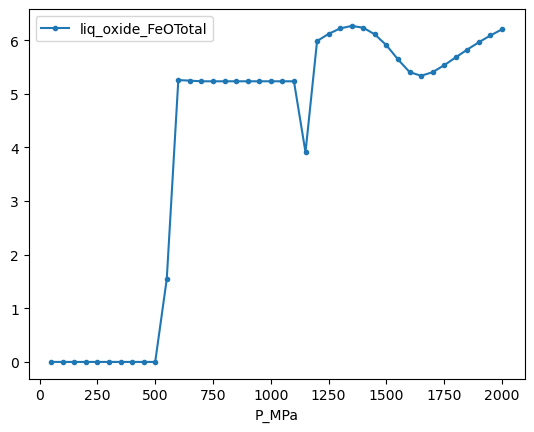

In [24]:
df['liq_oxide_FeOTotal'] = df["liq_oxide_FeO"] + df['liq_oxide_Fe2O3']/1.11
df.plot("P_MPa", "liq_oxide_FeOTotal", marker = '.')

## Run the sequence of calculations along a T, P=constant path:
Output is sent to an Excel file and plotted in the notebook

In [75]:
df.columns

Index(['step', 'status', 'T_C', 'P_MPa', 'total_mass_g', 'liquid_mass_g',
       'liquid_fraction', 'frac_liq', 'mass_Liquid', 'mass_Olivine',
       'mass_Orthopyroxene', 'mass_Augite', 'mass_Spinel', 'liq_oxide_SiO2',
       'liq_oxide_TiO2', 'liq_oxide_Al2O3', 'liq_oxide_Fe2O3',
       'liq_oxide_Cr2O3', 'liq_oxide_FeO', 'liq_oxide_MnO', 'liq_oxide_MgO',
       'liq_oxide_NiO', 'liq_oxide_CoO', 'liq_oxide_CaO', 'liq_oxide_Na2O',
       'liq_oxide_K2O', 'liq_oxide_P2O5', 'liq_oxide_H2O'],
      dtype='object')

In [75]:
number_of_steps = 40
t_increment_of_steps = -0.825
p_increment_of_steps = -50.0
threshold_melt_fraction = 0.01 # melt fractions below this amount remain in each fractionation step

In [76]:
def dynamic_fractionation(t,
                          p,
                          melts_obj = melts, 
                          threshold_liquid_fraction = 0.01,
                          frac_coeff = frac_coeff,
                          t_increment_of_steps = t_increment_of_steps,
                          p_increment_of_steps = p_increment_of_steps
                          # If melts are below threshold no melt is removed
                         ):
    total_gram = melts.get_mass_of_phase(xmlout)
    liquid_gram = melts.get_mass_of_phase(xmlout, phase_name = "Liquid")
    liquid_fraction = liquid_gram/total_gram 
    
    if liquid_fraction > threshold_liquid_fraction:
        
        frac_coeff['Liquid'] = (liquid_fraction-threshold_liquid_fraction)/liquid_fraction

    frac_output = melts_obj.fractionate_phases(xmlout, frac_coeff)
        
    # print(f'frac_coef: {frac_coeff["Liquid"]}')
    # print(f'liquid_fraction: {liquid_fraction}')
    # print(f'Total: {total_gram}')
    # print(f'P: {p}, T:{t}')
    output = melts_obj.equilibrate_tp(t+t_increment_of_steps, p+p_increment_of_steps, initialize=True)
    return output
    

success, Optimal residual norm.  1389.17  1950.00
success, Optimal residual norm.  1388.35  1900.00
success, Optimal residual norm.  1387.52  1850.00
success, Optimal residual norm.  1386.70  1800.00
success, Optimal residual norm.  1385.87  1750.00
success, Optimal residual norm.  1385.05  1700.00
success, Optimal residual norm.  1384.22  1650.00
success, Optimal residual norm.  1383.40  1600.00
success, Optimal residual norm.  1382.57  1550.00
success, Optimal residual norm.  1381.75  1500.00
success, Optimal residual norm.  1380.92  1450.00
success, Optimal residual norm.  1380.10  1400.00
success, Optimal residual norm.  1379.27  1350.00
success, Optimal residual norm.  1378.45  1300.00
success, Optimal residual norm.  1377.62  1250.00
success, Optimal residual norm.  1376.80  1200.00
success, Optimal residual norm.  1375.97  1150.00
success, Optimal residual norm.  1375.15  1100.00
success, Optimal residual norm.  1374.32  1050.00
success, Optimal residual norm.  1373.50  1000.00


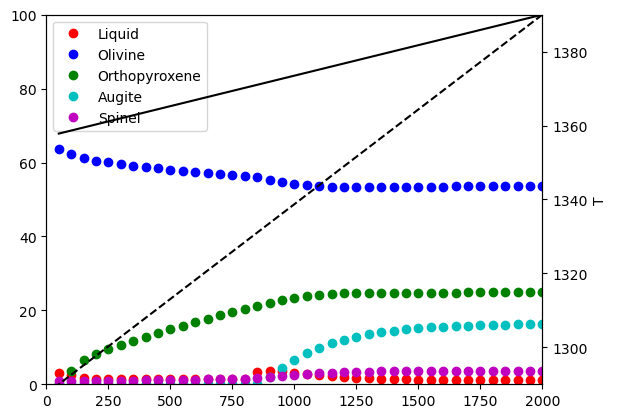

In [77]:

plotPhases = ['Liquid', 'Olivine', 'Orthopyroxene', 'Augite', 'Spinel']
# matplotlib colors b : blue, g : green, r : red, c : cyan, m : magenta, y : yellow, k : black, w : white.
plotColors = [ 'ro', 'bo', 'go', 'co', 'mo']

wb = melts.start_excel_workbook_with_sheet_name(sheetName="Summary")
melts.update_excel_workbook(wb, xmlout)

n = len(plotPhases)
xPlot = np.zeros(number_of_steps)
yPlot = np.zeros((n, number_of_steps))
y2Plot = np.linspace(t, t-100.0, number_of_steps)
y3Plot = np.linspace(t, t-100.0, number_of_steps)
xPlot[0] = p
for i in range (0, n):
    yPlot[i][0] = melts.get_property_of_phase(xmlout, plotPhases[i])
y2Plot[0] = t

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([min(p, p+p_increment_of_steps*number_of_steps), max(p, p+p_increment_of_steps*number_of_steps)])
ax.set_ylim([0., 100.])
ax2 = ax.twinx()
ax2.set_ylabel('T', color='k')
ax2.set_ylim([t-100, t])

graphs = []
for i in range (0, n):
    graphs.append(ax.plot(xPlot, yPlot[i], plotColors[i]))
graphs.append(ax2.plot(xPlot, y2Plot, 'k-'))
graphs.append(ax2.plot(xPlot, y3Plot, 'k--'))
handle = []
for (graph,) in graphs:
    handle.append(graph)
ax.legend(handle, plotPhases, loc='upper left')


for i in range (1, number_of_steps):
    # fractionate phases
    output  = dynamic_fractionation(t, p, melts_obj = melts, 
                          threshold_liquid_fraction = threshold_melt_fraction)
    (status, t, p, xmlout) = output[0]
    
    print ("{0:<30s} {1:8.2f} {2:8.2f}".format(status, t, p))
    xPlot[i] = p
    for j in range (0, n):
        yPlot[j][i] = melts.get_property_of_phase(xmlout, plotPhases[j])
    y2Plot[i] = t
    j = 0
    for (graph,) in graphs:
        graph.set_xdata(xPlot)
        if j < n:
            graph.set_ydata(yPlot[j])
        elif j == n:
            graph.set_ydata(y2Plot)
        j = j + 1
    fig.canvas.draw()
    melts.update_excel_workbook(wb, xmlout)

melts.write_excel_workbook(wb, "PMelts_DMM_DynamicFractionalMelting_summary.xlsx")

In [78]:
melts.get_list_of_phases_in_assemblage(xmlout)

['Liquid', 'Olivine', 'Spinel']

In [37]:
'oxide_wt'
print('Liquid composition in mole fraction:')
out = melts.get_composition_of_phase(xmlout,phase_name='Liquid',mode='oxide_wt')
for key,value in out.items():
    print ("{0:<15s} {1:13.6e}".format(key, value))

Liquid composition in mole fraction:
SiO2             6.525408e+01
TiO2             2.680812e-02
Al2O3            3.330269e+00
Fe2O3            1.333280e+00
Cr2O3            2.032071e-01
FeO              6.344922e+00
MgO              2.061374e+01
CaO              2.893663e+00
Na2O             2.417407e-05
K2O              2.384234e-10
H2O              4.371937e-10


In [13]:
out


{'Cr2O3': 100.0}

In [26]:
melts.set_bulk_composition(out)

NameError: name 'out' is not defined

In [29]:
'oxide_wt'
print('Liquid composition in mole fraction:')
out = melts.get_composition_of_phase(xmlout,phase_name='Solids',mode='oxide_wt')
for key,value in out.items():
    print ("{0:<15s} {1:13.6e}".format(key, value))

Liquid composition in mole fraction:


<generator object Worksheet.values at 0x7e13e5ee4820>

0.5652173913043478